In [128]:
#read csv valid responses

import pandas as pd


valid_responses = pd.read_csv('valid_responses.csv')
valid_responses.head(1)

total_valid_responses = len(valid_responses)

# Country of Work

In [129]:
valid_responses['Q40'].replace({'United States of America': 'USA', 'United Kingdom of Great Britain and Northern Ireland': 'UK'}, inplace=True)

#replace with "Unknown" if Nan
valid_responses['Q40'].fillna('Unknown', inplace=True)

/var/folders/_n/834qbp2x5yx2z7lztkn63hh40000gn/T/ipykernel_2454/3498427145.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  valid_responses['Q40'].replace({'United States of America': 'USA', 'United Kingdom of Great Britain and Northern Ireland': 'UK'}, inplace=True)


In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

country_counts = valid_responses['Q40'].value_counts().reset_index()
country_counts.columns = ['Country', 'Number of Respondents']

#calculate percentages
country_counts['Perentage of respondents'] = country_counts['Number of Respondents']/total_valid_responses*100

# Calculate proportions
#country_counts['Proportion'] = country_counts['Number of Respondents']

country_counts

,Country,Number of Respondents,Perentage of respondents
0,Unknown,20,38.461538
1,New Zealand,12,23.076923
2,Sri Lanka,6,11.538462
3,Sweden,3,5.769231
4,Germany,3,5.769231
5,Canada,1,1.923077
6,France,1,1.923077
7,Norway,1,1.923077
8,Italy,1,1.923077
9,USA,1,1.923077


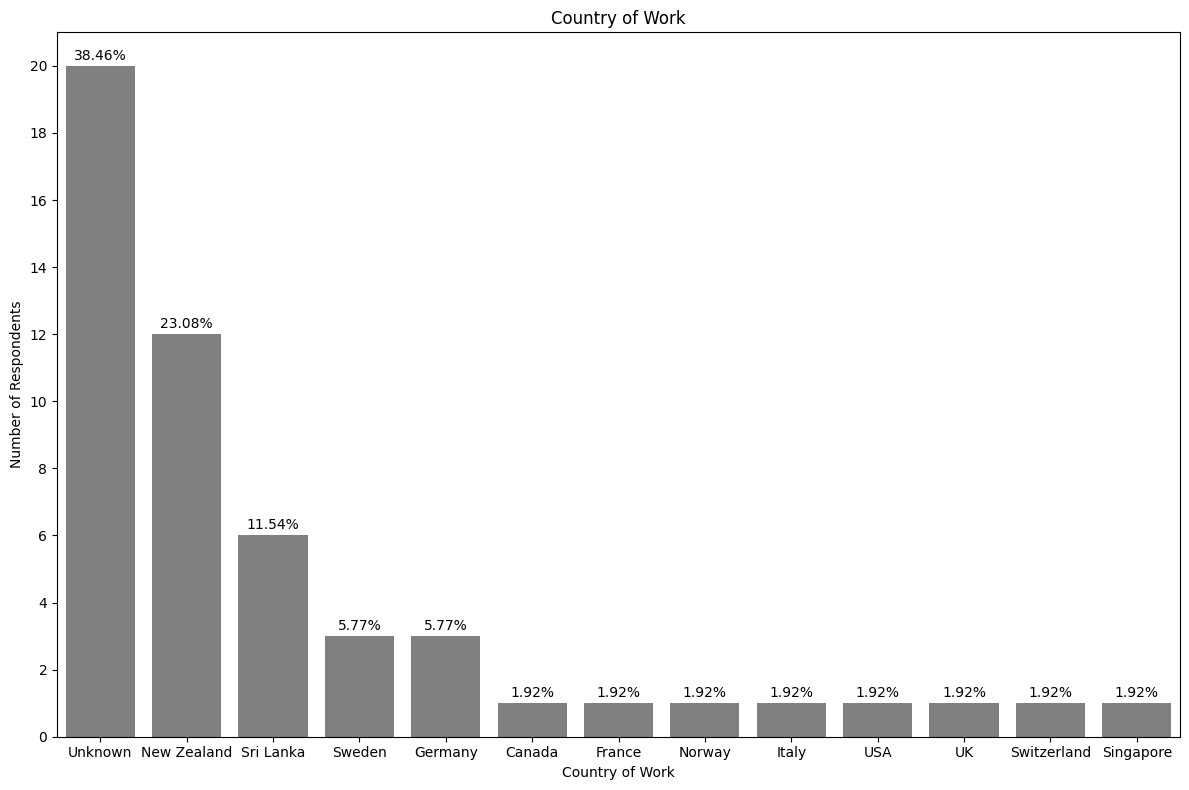

In [131]:
# Calculate the percentage of respondents for each country
country_counts['Percentage of respondents'] = (country_counts['Number of Respondents'] / total_valid_responses) * 100

plt.figure(figsize=(12, 8))

# Define the custom color palette
colors = ['skyblue' if country in ['New Zealand', 'Sri Lanka', 'Sweden', 'Germany'] else 'grey' for country in country_counts['Country']]

# Create the vertical barplot
ax = sns.barplot(data=country_counts, x='Country', y='Number of Respondents', color='grey')

# Display the percentage on the bars
for index, row in country_counts.iterrows():
    # Place the text above the bars
    ax.text(x=index,  # Position at the center of each bar
            y=row['Number of Respondents'] + 0.1,  # Add a small offset to position above the bar
            s=f"{round(row['Percentage of respondents'], 2)}%",  # Text to display
            color='black', 
            ha="center",  # Horizontally align text to the center of the bar
            va="bottom")  # Vertically align text to the bottom of the specified y coordinate

# Set the chart title and labels
plt.title('Country of Work')
plt.xlabel('Country of Work')
plt.ylabel('Number of Respondents')

plt.yticks(range(0, 21, 2))

plt.tight_layout()

plt.savefig('Plots/country_of_work.svg')

plt.savefig('Plots/country_of_work.png')
# Show the plot
plt.show()


# Type of Company

In [132]:
#replace with "Unknown" if nan
valid_responses['Q34'].fillna('Unknown', inplace=True)

org_counts = valid_responses['Q34'].value_counts().reset_index()
org_counts.columns = ['Type of Organization', 'Number of Respondents']
org_counts['Type of Organization'] = org_counts['Type of Organization'] #.str.replace('/', '/\n')

#calculate percentages
org_counts['Perentage of respondents'] = org_counts['Number of Respondents']/total_valid_responses*100

# Calculate proportions
#role_counts['Proportion'] = role_counts['Number of Respondents']

org_counts


/var/folders/_n/834qbp2x5yx2z7lztkn63hh40000gn/T/ipykernel_2454/3296253941.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  valid_responses['Q34'].fillna('Unknown', inplace=True)


,Type of Organization,Number of Respondents,Perentage of respondents
0,Unknown,19,36.538462
1,Large Business - International,13,25.000000
2,Large Business - Domestic,7,13.461538
3,Small to Medium Business (SME) - Domestic,5,9.615385
4,Small to Medium Business (SME) - International,3,5.769231
5,Small Business - Domestic,3,5.769231
6,Small Business - International,2,3.846154


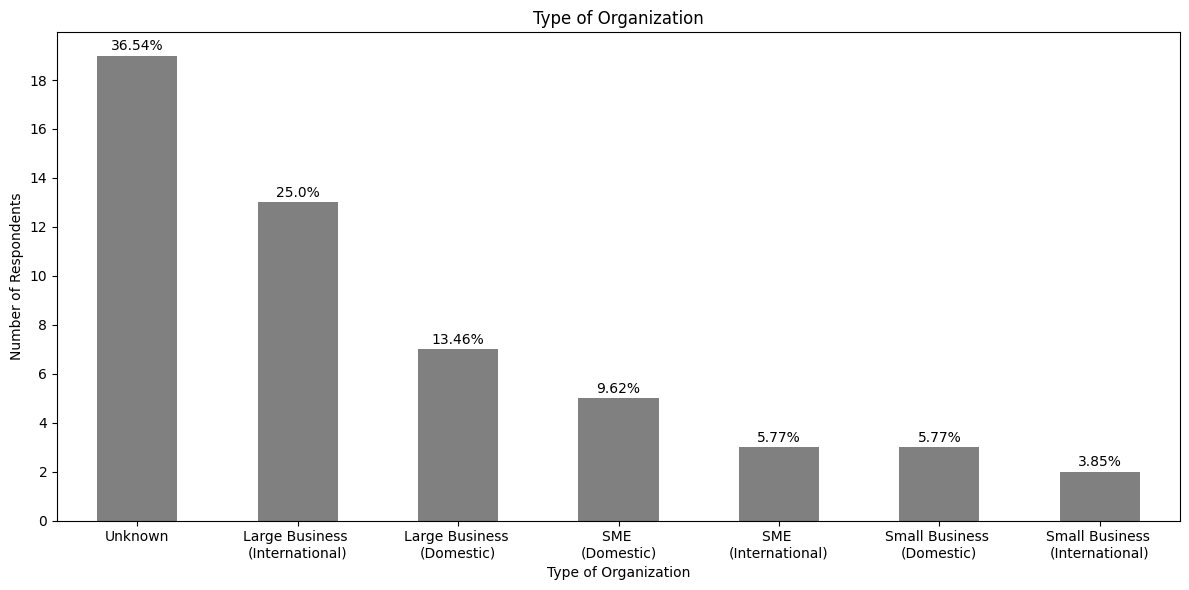

In [133]:
# Calculate the percentage of respondents for each country
org_counts['Percentage of respondents'] = (org_counts['Number of Respondents'] / total_valid_responses) * 100

# Rename "Other (please specify)" to "Other"
org_counts['Type of Organization'] = org_counts['Type of Organization'].replace('Large Business - International', 'Large Business \n(International)')
org_counts['Type of Organization'] = org_counts['Type of Organization'].replace('Large Business - Domestic', 'Large Business \n(Domestic)')
org_counts['Type of Organization'] = org_counts['Type of Organization'].replace('Small to Medium Business (SME) - International', 'SME \n(International)')
org_counts['Type of Organization'] = org_counts['Type of Organization'].replace('Small to Medium Business (SME) - Domestic', 'SME \n(Domestic)')
org_counts['Type of Organization'] = org_counts['Type of Organization'].replace('Small Business - International', 'Small Business \n(International)')
org_counts['Type of Organization'] = org_counts['Type of Organization'].replace('Small Business - Domestic', 'Small Business \n(Domestic)')

plt.figure(figsize=(12, 6))

# Create the vertical barplot
ax = sns.barplot(data=org_counts, x='Type of Organization', y='Number of Respondents', color='grey', width=0.5)

# Display the percentage on the bars
for index, row in org_counts.iterrows():
    # Place the text above the bars
    ax.text(x=index,  # Position at the center of each bar
            y=row['Number of Respondents'] + 0.1,  # Add a small offset to position above the bar
            s=f"{round(row['Percentage of respondents'], 2)}%",  # Text to display
            color='black', 
            ha="center",  # Horizontally align text to the center of the bar
            va="bottom")  # Vertically align text to the bottom of the specified y coordinate
    
    # Set x-axis ticks to show full numbers without decimal points
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Set the chart title and labels
plt.title('Type of Organization')
plt.xlabel('Type of Organization')
plt.ylabel('Number of Respondents')
plt.tight_layout()

plt.savefig('Plots/type_of_org.svg')

plt.savefig('Plots/type_of_org.png')
# Show the plot
plt.show()


# Role at work

In [134]:
#replace with "Unknown" if nan
valid_responses['Q3'].fillna('Unknown', inplace=True)

role_counts = valid_responses['Q3'].value_counts().reset_index()
role_counts.columns = ['Role at Work', 'Number of Respondents']
role_counts['Role at Work'] = role_counts['Role at Work'].str.replace('/', '/\n')

#calculate percentages
role_counts['Perentage of respondents'] = role_counts['Number of Respondents']/total_valid_responses*100

# Calculate proportions
#role_counts['Proportion'] = role_counts['Number of Respondents']

role_counts

/var/folders/_n/834qbp2x5yx2z7lztkn63hh40000gn/T/ipykernel_2454/3312099154.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  valid_responses['Q3'].fillna('Unknown', inplace=True)


,Role at Work,Number of Respondents,Perentage of respondents
0,Software Engineer/\n Systems Engineer/\n Devel...,26,50.000000
1,Other (Please specify),9,17.307692
2,Systems Architect/\n Software Architect/\n Tec...,5,9.615385
3,Project Manager/\n Product Manager/\n Team Lead,4,7.692308
4,Business Analyst/\n Requirements Engineer,3,5.769231
5,Unknown,3,5.769231
6,QA Manager/\n QA Lead/\n Quality Assurance Eng...,1,1.923077
7,Product Owner (PO),1,1.923077


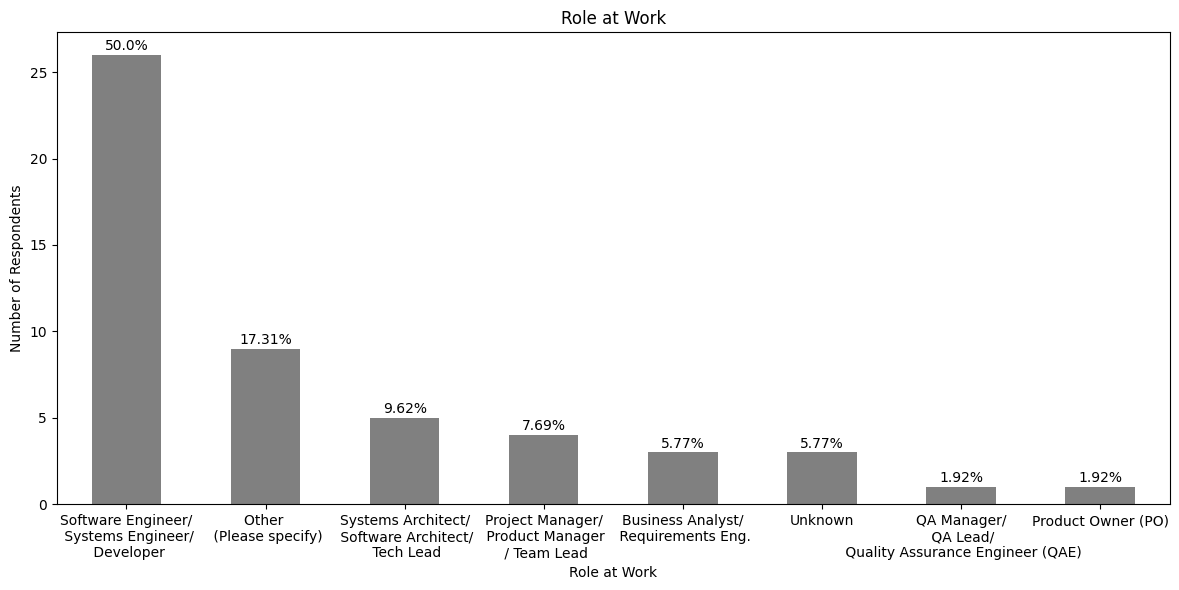

In [135]:
# Total number of valid responses
total_valid_responses = 52

# Calculate the percentage of respondents for each country
role_counts['Percentage of respondents'] = (role_counts['Number of Respondents'] / total_valid_responses) * 100

# Rename "Other (please specify)" to "Other"
role_counts['Role at Work'] = role_counts['Role at Work'].replace('Other (Please specify)', 'Other \n (Please specify)')
role_counts['Role at Work'] = role_counts['Role at Work'].replace('Project Manager/\n Product Manager/\n Team Lead', 'Project Manager/\n Product Manager\n / Team Lead')
role_counts['Role at Work'] = role_counts['Role at Work'].replace('Business Analyst/\n Requirements Engineer', 'Business Analyst/\n Requirements Eng.')
# Define the custom color palette
#colors = ['skyblue' if role in ['/ Systems Engineer/ DeveloperSoftware Engineer', 'Systems Architect/ Software Architect/ Tech Lead'] else 'grey' for role in role_counts['Role at Work']]


plt.figure(figsize=(12, 6))

# Create the vertical barplot
ax = sns.barplot(data=role_counts, x='Role at Work', y='Number of Respondents', color='grey', width=0.5) #palette='color'

# Display the percentage on the bars
for index, row in role_counts.iterrows():
    # Place the text above the bars
    ax.text(x=index,  # Position at the center of each bar
            y=row['Number of Respondents'] + 0.1,  # Add a small offset to position above the bar
            s=f"{round(row['Percentage of respondents'], 2)}%",  # Text to display
            color='black', 
            ha="center",  # Horizontally align text to the center of the bar
            va="bottom")  # Vertically align text to the bottom of the specified y coordinate
    
# Set x-axis ticks to show full numbers without decimal points
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Set the chart title and labels
plt.title('Role at Work')
plt.xlabel('Role at Work')
plt.ylabel('Number of Respondents')
plt.tight_layout()

plt.savefig('Plots/role_at_work.svg')

plt.savefig('Plots/role_at_work.png')
# Show the plot
plt.show()


# Experience at Work

In [136]:
#replace with "Unknown" if nan
valid_responses['Q5'].fillna('Unknown', inplace=True)

role_exp_counts = valid_responses['Q5'].value_counts().reset_index()
role_exp_counts.columns = ['Experience at Work', 'Number of Respondents']
role_exp_counts['Experience at Work'] = role_exp_counts['Experience at Work'] #.str.replace('/', '/\n')

#calculate percentages
role_exp_counts['Perentage of respondents'] = role_exp_counts['Number of Respondents']/total_valid_responses*100

# Calculate proportions
#role_counts['Proportion'] = role_counts['Number of Respondents']

role_exp_counts

/var/folders/_n/834qbp2x5yx2z7lztkn63hh40000gn/T/ipykernel_2454/2508539575.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  valid_responses['Q5'].fillna('Unknown', inplace=True)


,Experience at Work,Number of Respondents,Perentage of respondents
0,5-10 years,16,30.769231
1,1-2 years,12,23.076923
2,More than 10 years,9,17.307692
3,2-5 years,8,15.384615
4,Less than an year,7,13.461538


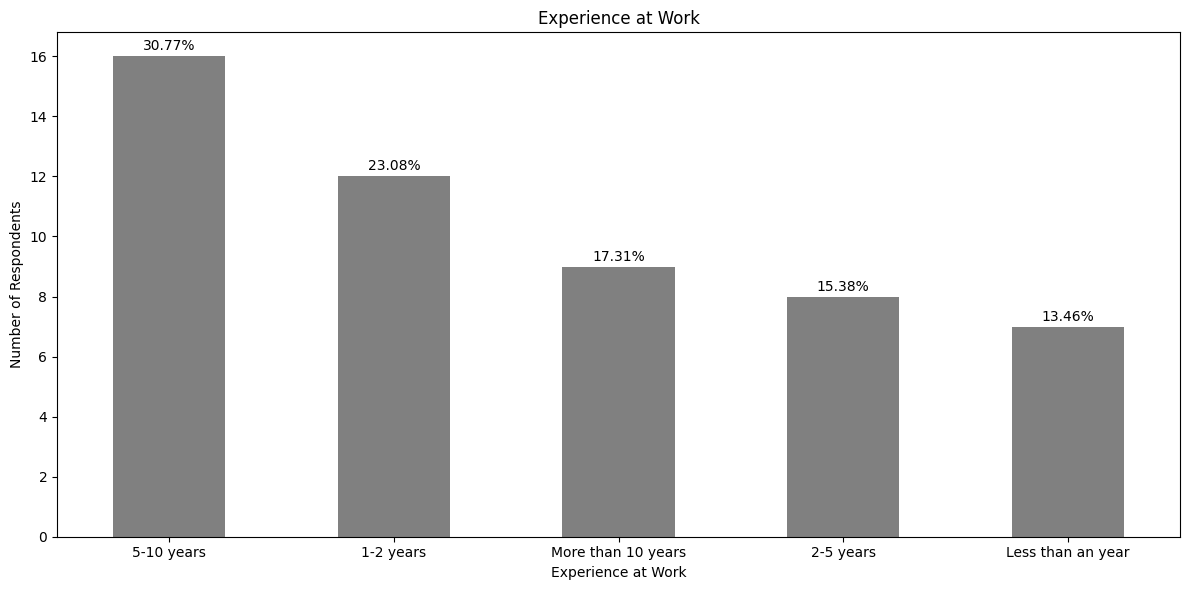

In [137]:
#role_exp_counts = role_exp_counts.sort_values(by='Experience at Work')

# Calculate the percentage of respondents for each country
role_exp_counts['Percentage of respondents'] = (role_exp_counts['Number of Respondents'] / total_valid_responses) * 100

plt.figure(figsize=(12, 6))

# Create the vertical barplot
ax = sns.barplot(data=role_exp_counts, x='Experience at Work', y='Number of Respondents', color='grey', width=0.5)

# Display the percentage on the bars
for index, row in role_exp_counts.iterrows():
    # Place the text above the bars
    ax.text(x=index,  # Position at the center of each bar
            y=row['Number of Respondents'] + 0.1,  # Add a small offset to position above the bar
            s=f"{round(row['Percentage of respondents'], 2)}%",  # Text to display
            color='black', 
            ha="center",  # Horizontally align text to the center of the bar
            va="bottom")  # Vertically align text to the bottom of the specified y coordinate
    
    # Set x-axis ticks to show full numbers without decimal points
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Set the chart title and labels
plt.title('Experience at Work')
plt.xlabel('Experience at Work')
plt.ylabel('Number of Respondents')
plt.tight_layout()

plt.savefig('Plots/exp_at_work.svg')

plt.savefig('Plots/exp_at_work.png')
# Show the plot
plt.show()


# Development Methodology

In [138]:
#replace with "Unknown" if nan
valid_responses['Q37'].fillna('Unknown', inplace=True)

dev_method_counts = valid_responses['Q37'].value_counts().reset_index()
dev_method_counts.columns = ['Software development methodology practiced', 'Number of Respondents']
dev_method_counts['Software development methodology practiced'] = dev_method_counts['Software development methodology practiced'].str.replace('i.e.,', 'i.e.,\n')
dev_method_counts['Software development methodology practiced'] = dev_method_counts['Software development methodology practiced'].str.replace('and', 'and\n')
# Calculate proportions
#role_counts['Proportion'] = role_counts['Number of Respondents']

#calculate percentages
dev_method_counts['Perentage of respondents'] = dev_method_counts['Number of Respondents']/total_valid_responses*100
dev_method_counts

/var/folders/_n/834qbp2x5yx2z7lztkn63hh40000gn/T/ipykernel_2454/1870716892.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  valid_responses['Q37'].fillna('Unknown', inplace=True)


,Software development methodology practiced,Number of Respondents,Perentage of respondents
0,A hybrid approach of both traditional and\n ag...,18,34.615385
1,"Agile software development, i.e.,\n Continuous...",17,32.692308
2,Unknown,16,30.769231
3,"Traditional software development, i.e.,\n Wate...",1,1.923077


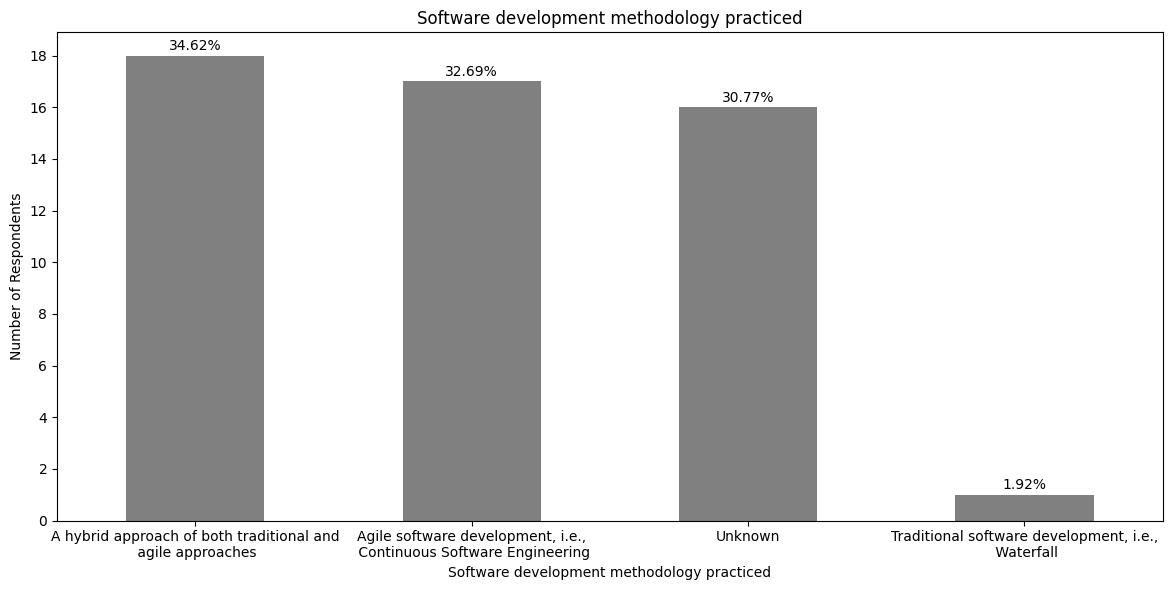

In [139]:
# Calculate the percentage of respondents for each country
dev_method_counts['Percentage of respondents'] = (dev_method_counts['Number of Respondents'] / total_valid_responses) * 100

# Rename "Other (please specify)" to "Other"

dev_method_counts['Software development methodology practiced']  = dev_method_counts['Software development methodology practiced'] .replace('A hybrid approach of both traditional and\n\n agile approaches', 'Hybrid \n(Traditional and Agile)')

dev_method_counts['Software development methodology practiced']  = dev_method_counts['Software development methodology practiced'] .replace('Agile software development, i.e.,\n\n Continuous Software Engineering', 'Agile')

dev_method_counts['Software development methodology practiced']  = dev_method_counts['Software development methodology practiced'] .replace('Traditional software development, i.e.,\n\n Waterfall', 'Traditional')

plt.figure(figsize=(12, 6))

# Create the vertical barplot
ax = sns.barplot(data=dev_method_counts, x='Software development methodology practiced', y='Number of Respondents', color='grey', width=0.5)

# Display the percentage on the bars
for index, row in dev_method_counts.iterrows():
    # Place the text above the bars
    ax.text(x=index,  # Position at the center of each bar
            y=row['Number of Respondents'] + 0.1,  # Add a small offset to position above the bar
            s=f"{round(row['Percentage of respondents'], 2)}%",  # Text to display
            color='black', 
            ha="center",  # Horizontally align text to the center of the bar
            va="bottom")  # Vertically align text to the bottom of the specified y coordinate
    
    # Set x-axis ticks to show full numbers without decimal points
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Set the chart title and labels
plt.title('Software development methodology practiced')
plt.xlabel('Software development methodology practiced')
plt.ylabel('Number of Respondents')
plt.tight_layout()

plt.savefig('Plots/dev_method.svg')

plt.savefig('Plots/dev_method.png')
# Show the plot
plt.show()


# Application Domains

In [140]:
valid_responses['Q35']
#valid_responses_domain = valid_responses['Q35'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)

#replace with "Unknown" if nan
valid_responses['Q35'].fillna('Unknown', inplace=True)

#slit the values in the column and stack them
domains = valid_responses['Q35'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)

domain_counts = domains.value_counts().reset_index()

#rename columns to Domain and Number of Respondents
domain_counts.columns = ['Application Domain', 'Number of Respondents']
#calculate percentages
domain_counts['Perentage of respondents'] = domain_counts['Number of Respondents']/total_valid_responses*100

domain_counts


/var/folders/_n/834qbp2x5yx2z7lztkn63hh40000gn/T/ipykernel_2454/4211702280.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  valid_responses['Q35'].fillna('Unknown', inplace=True)


,Application Domain,Number of Respondents,Perentage of respondents
0,Unknown,17,32.692308
1,Finance,11,21.153846
2,Other (Please specify),6,11.538462
3,Energy,6,11.538462
4,Automotive,6,11.538462
5,Distribution / Transportation/ Logistics,5,9.615385
6,Enterprise Resource Planning (ERP),5,9.615385
7,Compliance,4,7.692308
8,Audits and Certification,4,7.692308
9,Government Regulations / Policies,4,7.692308


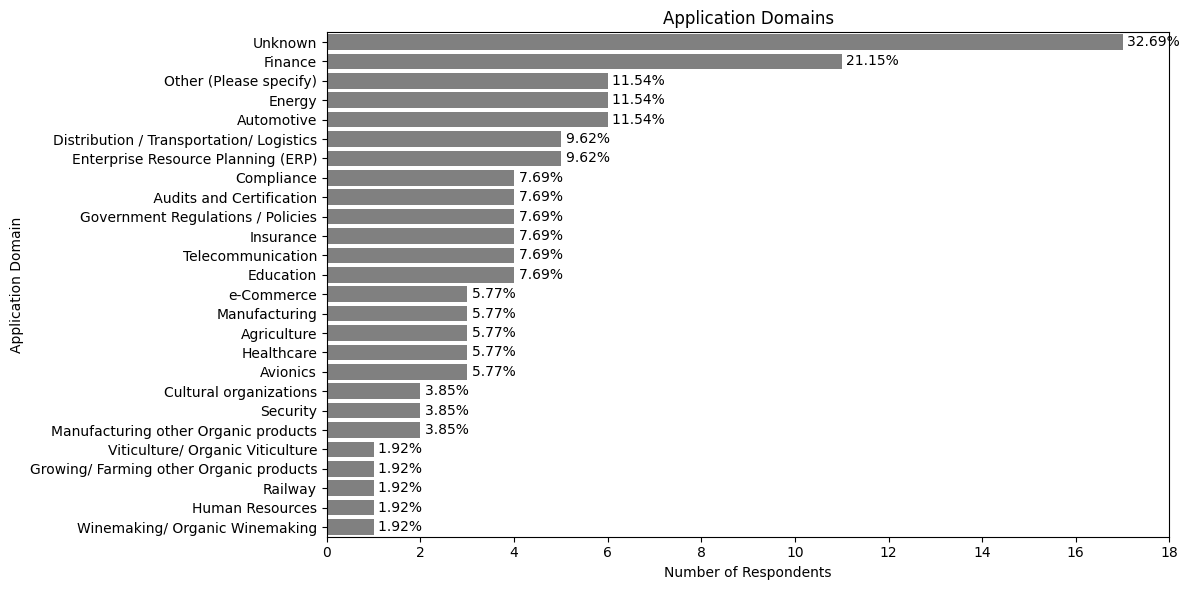

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


plt.figure(figsize=(12, 6))
# Create the barplot
ax = sns.barplot(data=domain_counts, x='Number of Respondents', y='Application Domain', color='grey')

# Find the maximum value of Number of Respondents to set the x-axis limit
max_respondents = domain_counts['Number of Respondents'].max()

# # Display the percentage on the bars
# for index, row in frq_counts.iterrows():
#     # Place the text in the middle of the bars
#     ax.text(x=row['Number of Respondents'], y=index, s=f"{round(row['Perentage of respondents'],2)}%", color='black', ha="center", va="center")

# Display the percentage on the bars
for index, row in domain_counts.iterrows():
    # Place the text to the right of the bars
    ax.text(x=row['Number of Respondents'] + 0.1,  # Add a small right offset to prevent overlap
            y=index,  # Position at the middle height of each bar
            s=f"{round(row['Perentage of respondents'],2)}% ",  # Text to display # add a space after
            color='black', 
            ha="left",  # Horizontally align text to the left of the specified x coordinate
            va="center")  # Vertically align text to the center of the specified y coordinate
    
    # Set x-axis ticks to show full numbers without decimal points
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Set the x-axis limit to ensure labels don't jut out of the chart
ax.set_xlim(0, max_respondents + 1)

# Set the chart title and labels
plt.title('Application Domains')
plt.xlabel('Number of Respondents')
plt.ylabel('Application Domain')
plt.tight_layout()

plt.savefig('Plots/domain.svg')

plt.savefig('Plots/domains.png')

# Show the plot
plt.show()


# Primary Activities

In [142]:
# Q50 Select from below (all) primary activities you perform in your current role. 

valid_responses['Q50'].fillna('Unknown', inplace=True)

# replace e.g., with e.g.
valid_responses['Q50'] = valid_responses['Q50'].str.replace(', e.g.,', '\n e.g. ')
valid_responses['Q50'] = valid_responses['Q50'].str.replace(', i.e., ', '\n i.e. ')

valid_responses['Q50'] = valid_responses['Q50'].str.replace('System Requirements Specification (SRS), as User Stories, as Use Case Diagrams', 'System Requirements Specification (SRS) or as User Stories or as Use Case Diagrams')
valid_responses['Q50'] = valid_responses['Q50'].str.replace('through stakeholder interviews, user forums, and observations', 'through stakeholder interviews or user forums or observations')
valid_responses['Q50'] = valid_responses['Q50'].str.replace('to validate that requirements have been implemented correctly, to test that the software functions', 'to validate that requirements have been implemented correctly or to test that the software functions')
valid_responses['Q50'] = valid_responses['Q50'].str.replace('what requirements to implement, what to refactor', 'what requirements to implement or what to refactor')

#slit the values in the column and stack them
activities = valid_responses['Q50'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)

activity_counts = activities.value_counts().reset_index()

#rename columns to Primary activities performed and Number of Respondents

activity_counts.columns = ['Primary activities performed', 'Number of Respondents']
#calculate percentages
activity_counts['Perentage of respondents'] = activity_counts['Number of Respondents']/activity_counts['Number of Respondents'].sum()*100

activity_counts

/var/folders/_n/834qbp2x5yx2z7lztkn63hh40000gn/T/ipykernel_2454/4044007480.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  valid_responses['Q50'].fillna('Unknown', inplace=True)


,Primary activities performed,Number of Respondents,Perentage of respondents
0,Implementing feature enhancements,37,11.858974
1,Making improvements to the code\n i.e. Refacto...,35,11.217949
2,Writing or modifying software code to implemen...,34,10.897436
3,Fixing bugs,34,10.897436
4,Making architectural design decisions to accom...,30,9.615385
5,Testing or writing tests\n e.g. to validate t...,27,8.653846
6,Making decisions on behalf of the team\n e.g. ...,26,8.333333
7,Validating requirements\n e.g. through user f...,23,7.371795
8,Capturing user needs\n e.g. through stakehold...,21,6.730769
9,Documenting requirements\n e.g. in a System R...,20,6.410256


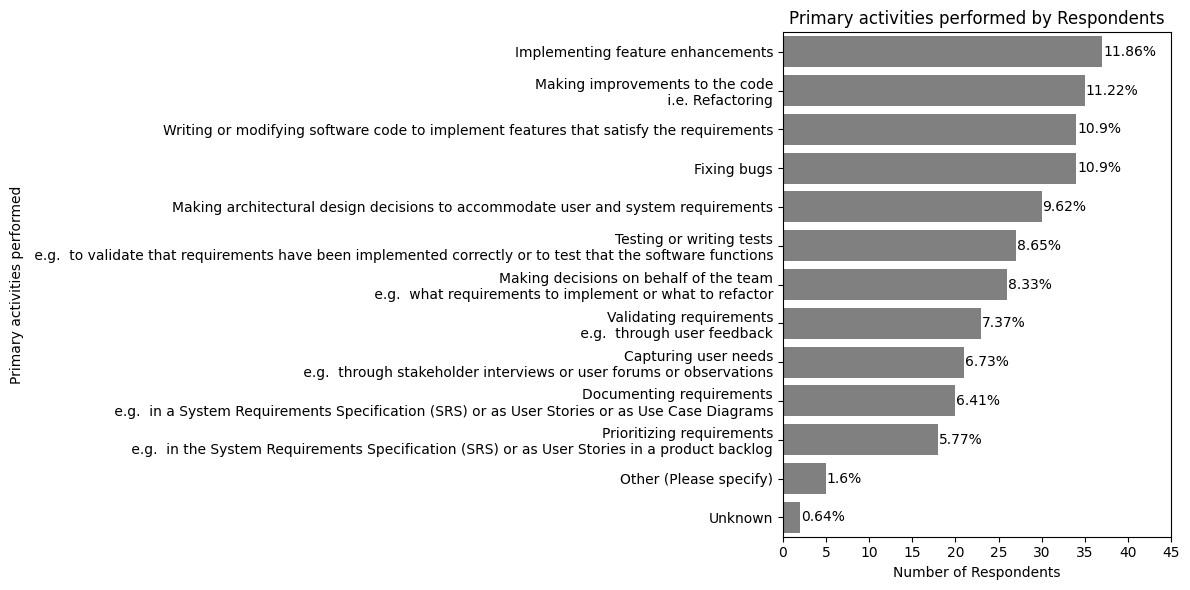

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


plt.figure(figsize=(12, 6))
# Create the barplot
ax = sns.barplot(data=activity_counts, x='Number of Respondents', y='Primary activities performed', color ='grey')

# Find the maximum value of Number of Respondents to set the x-axis limit
max_respondents = activity_counts['Number of Respondents'].max()

# # Display the percentage on the bars
# for index, row in frq_counts.iterrows():
#     # Place the text in the middle of the bars
#     ax.text(x=row['Number of Respondents'], y=index, s=f"{round(row['Perentage of respondents'],2)}%", color='black', ha="center", va="center")

# Display the percentage on the bars
for index, row in activity_counts.iterrows():
    # Place the text to the right of the bars
    ax.text(x=row['Number of Respondents'] + 0.1,  # Add a small right offset to prevent overlap
            y=index,  # Position at the middle height of each bar
            s=f"{round(row['Perentage of respondents'],2)}%",  # Text to display 
            color='black', 
            ha="left",  # Horizontally align text to the left of the specified x coordinate
            va="center",
            bbox=dict(facecolor='white', alpha=0)) 
            #add white space after
            #bbox=dict(facecolor='white', alpha=0.5)
        
    # Set x-axis ticks to show full numbers without decimal points
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Set the x-axis limit to ensure labels don't jut out of the chart
ax.set_xlim(0, max_respondents + 8)

# Set the chart title and labels
plt.title('Primary activities performed by Respondents')
plt.xlabel('Number of Respondents')
plt.ylabel('Primary activities performed')
#ax.set_yticks(ax.get_yticks() + 0.5) 
plt.tight_layout()

#layout with padding on the right 


plt.savefig('Plots/activities.svg')

plt.savefig('Plots/activities.png')

# Show the plot
plt.show()
